<a href="https://colab.research.google.com/github/Sharon972/codigo_introduccion/blob/CodigosPrueba/TITANIC_PRACTICE_DECISION_TREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENTRENAMIENTO CON DATA TITANIC**

// ***Usando Decision Tree***  //

In [1]:
#IMPORTACIÓN DE LIBRERÍAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import metrics

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/titanic_train.csv')

In [3]:
print(data.columns)
print(f'// Número de columnas: {data.columns.size} //')

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
// Número de columnas: 12 //


In [4]:
data.shape

(891, 12)

Veo las columnas que contienen la data de tipo object y numéricos

In [5]:
lista_obj = list()
lista_num = []
for i in data.columns:
  if data[i].dtype == 'object':
    lista_obj.append(i)
  elif data[i].dtype == 'int64' or data[i].dtype == 'float64':
    lista_num.append(i)

print(f'objects : {lista_obj}')
print(f'núme. columnas object: {len(lista_obj)}')
print(f'numericos : {lista_num}')
print(f'núm. columnas numéricas: {len(lista_num)}')

objects : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
núme. columnas object: 5
numericos : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
núm. columnas numéricas: 7


In [ ]:
#otra forma de obtener las columnas numéricas
#columnas_numericas = data.select_dtypes(include='number').columns
#columnas_numericas

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [6]:
data.groupby('Survived')[lista_num].mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,,
0,447.016393,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408


**VARIABLES**

In [7]:
# Variables
x = data[lista_num] #variables independientes
y = data['Survived'] #variable dependiente

*Variables categóricas (sex, PassengerId)*

In [8]:
grupo_prueba1 = data.groupby(['Survived','Sex']).agg({'Survived':'count'})#este uso más
grupo_prueba2 = data.groupby(['Survived','Sex'])['Survived'].mean()
print(type(grupo_prueba1))
print(type(grupo_prueba2))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


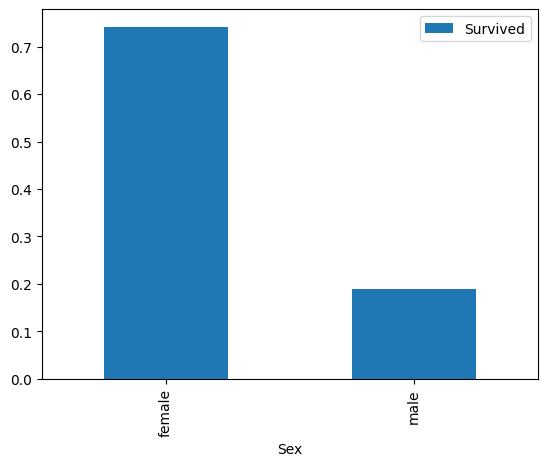

In [9]:
#promedio entre hombres y mujeres sobrevivientes

data.groupby('Sex').agg({'Survived':'mean'}).plot.bar()
plt.show()

*Variable ordinal (Pclass)*

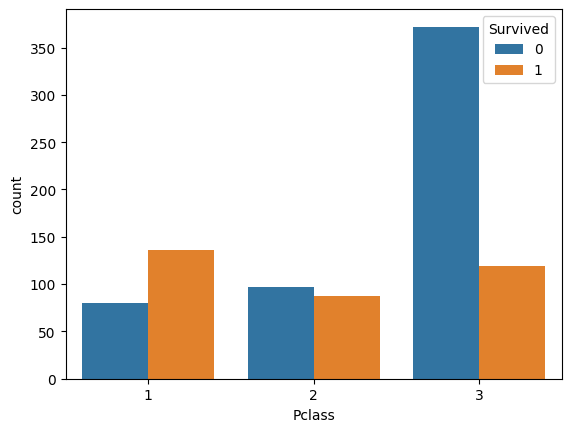

In [10]:
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.show()

In [ ]:
#IMPACTO DE 'SEX' Y 'PCLASS'

In [11]:
pd.crosstab([data['Sex'], data['Survived']],data['Pclass'], margins = True).style.background_gradient(cmap = 'summer_r')


*Variable continua (Age)*

In [12]:
data.Age.value_counts().to_frame().style.background_gradient(cmap = 'BuPu')

,count
Age,
24.000000,30
22.000000,27
18.000000,26
19.000000,25
28.000000,25
30.000000,25
21.000000,24
25.000000,23
36.000000,22


In [13]:
data.loc[data['Age'] == 0.42]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


**CORRELACIÓN**

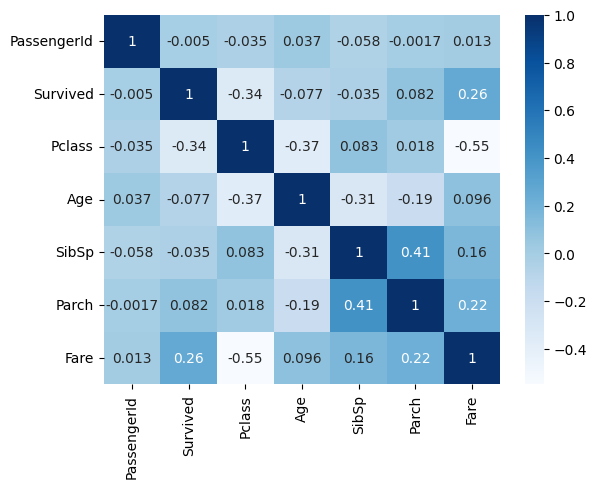

In [14]:
#Muestro el coeficiente de correlación

data_cor = data[lista_num].corr()
sns.heatmap(data_cor, annot=True, cmap='Blues')
plt.show()

In [16]:
#Muestro en un dataframe qué variables el valor de la correlación entre la s variables de mayor a menor
data_cor.unstack().sort_values(ascending=False).to_frame().style.background_gradient(cmap = 'BuPu')

,,0
PassengerId,PassengerId,1.000000
Survived,Survived,1.000000
Parch,Parch,1.000000
SibSp,SibSp,1.000000
Pclass,Pclass,1.000000
Age,Age,1.000000
Fare,Fare,1.000000
SibSp,Parch,0.414838
Parch,SibSp,0.414838
Fare,Survived,0.257307


Generalmente los algoritmos de machine learning no admiten variables categóricas por lo que se codifican

In [17]:
#Acá hago ingeniería de datos
data.Fare.nunique()

248

In [18]:
 #Por si quiero separar mi data en intervalos "qcut me sirve"
 #pd.qcut(data.Age, 13) #me subdivide la data en 13 intervalos

,Age
0,"(19.0, 25.0]"
1,"(31.8, 41.0]"
2,"(25.0, 31.8]"
3,"(31.8, 41.0]"
4,"(31.8, 41.0]"
5,NaN
6,"(41.0, 80.0]"
7,"(0.419, 19.0]"
8,"(25.0, 31.8]"
9,"(0.419, 19.0]"


In [19]:
#import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import metrics

In [20]:
data = data.drop(['PassengerId','Name','Cabin','Ticket'], axis = 1)

In [21]:
data.dtypes

,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object


In [22]:
data.Age = data.Age.fillna(data.Age.mean())
data.Embarked = data.Embarked.fillna(data.Embarked.mode()[0])
data.Pclass = data.Pclass.astype(str)

#Defino mis variables

In [23]:
# Variables
features = data.drop('Survived', axis = 1) #variables independientes
label = data['Survived'] #variable dependiente

In [24]:
#Hago one-hot-encoding a mis variables categóricas
#para que lo pueda entender el algoritmo

for i in features.dtypes[features.dtypes == "object"].index:
  #Borramos la columna de tipo object y lo almacenamos en un objeto tipo series
  col4 = features.pop(i)
  features = pd.concat([features, pd.get_dummies(col4, prefix = i)], axis = 1)


In [ ]:
#RECUERDA siempre colocar random_state a train_test_split y al instanciar la clase y puede ir cualquier entero

Particiono mi data

In [46]:
xtrain, xtest, Y_train, Y_test  = train_test_split(features,label,test_size = 0.2, stratify = y)

Instancio la clase y ajusto

In [71]:
ModelPrueba1 = DecisionTreeClassifier(random_state=999)

Ajusto mi modelo

In [72]:
ModelPrueba1.fit(xtrain, Y_train)

DecisionTreeClassifier(random_state=999)

PREDIGO en base a mis datos separados test, para probar si funciona bien

In [73]:
Y_model = ModelPrueba1.predict(xtest)

Calculo el score

In [74]:
Modelr2 = ModelPrueba1.score(xtest, Y_test) #Precision
print(Modelr2)
#81% de las predicciones sobre si sí sobrevivieron son correctas

0.7486033519553073


Indicador de calidad

*clasificación: matriz de confusión, accurracy_score, AUC*

In [75]:
MatrixCo = metrics.confusion_matrix(Y_test, Y_model)
print(MatrixCo)

[[89 21]
 [24 45]]


In [77]:
#AUC #lo uso mucho en problemas binarios de si llega a 0.5 mal
AUC = metrics.roc_auc_score(Y_test, Y_model)
print(AUC)

0.7306324110671937


Visualizo el modelo

In [ ]:
from sklearn.tree import export_text
print(export_text(ModelPrueba1))

ModelPrueba1_text = export_text(ModelPrueba1)

with open("ModelPrueba1_text.txt", "w") as file:
    file.write(ModelPrueba1_text)

from sklearn.tree import plot_tree

plt.figure(figsize=(30,30))
plot_tree(ModelPrueba1, filled = True)
plt.savefig('ModelPrueba1_text.png', dpi = 600)

Veo los parámetros del modelo

In [78]:
ModelPrueba1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 999,
 'splitter': 'best'}

HAGO BARRIDO DE HIPERPARÁMETROS

In [81]:
#Veo eso y no mejora mucho, CONSIDERO HACER UN BARRIDO CONSIDERANDO
#OTROS HIPERPARÁMETROS para mejorar el poder interpretativo

from sklearn.model_selection import GridSearchCV

#Diccionario que define el espacio de búsqueda
DictHP_Dt1 = {'criterion': ["gini", "entropy", "log_loss"],
              'splitter': ['best','random'],
              'max_depth':[3,5,7,11,15,55,57,61,63,70],
              }

#Realizamos el barrido de hiperparámetros
ModTreeBase = DecisionTreeClassifier()
ModTreeBase_gs = GridSearchCV(estimator = ModTreeBase,
                              param_grid = DictHP_Dt1,
                              verbose=4,
                              cv  = 3,
                              n_jobs = -1,
                              scoring = 'accuracy')

#Ajusto mi modelo
import time
inicio = time.time()
hist = ModTreeBase_gs.fit(xtrain, Y_train)
fin = time.time()
print('Tiempo de ejecución',fin-inicio)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Tiempo de ejecución 2.608708620071411


Veo los mejores parámetros que salieron en este barrido

In [82]:
import pickle

MejorModelo = hist.best_estimator_
print(MejorModelo)

DecisionTreeClassifier(criterion='log_loss', max_depth=3, splitter='random')


Vuelvo a entrenar

In [84]:
#Ajusto
MejorModelo.fit(xtrain, Y_train)
#Predigo
Y_model1= MejorModelo.predict(xtest)
#Calculo el score
Modelr2 = MejorModelo.score(xtest, Y_test) #Precision
print(Modelr2)

#Veo la matriz de confusión y el AUC
MatrixCo = metrics.confusion_matrix(Y_test, Y_model1)
print(MatrixCo)
AUC = metrics.roc_auc_score(Y_test, Y_model1)
print(AUC)

[[105   5]
 [ 29  40]]
0.7671277997364954


Guardo mi nuevo modelo

In [ ]:
import pickle
MejorModeloDiscoDuro = 'ModeloClfDT_14julio.pkl'

with open(MejorModeloDiscoDuro, 'wb') as file:
  pickle.dump(MejorModelo, file)

*Ahora puedo usar un 'Random Forest' o uno 'SVM' para quizas mejorar mi modelo, depende, solo cambio la instancia y el barrido de hiperparámetros*